<a href="https://colab.research.google.com/github/andresvivancov/Zype_TA_Kaggle_TrendingYouTubeVideoStatistics/blob/master/Zype_TA_Trending_YouTube_Video_Statistics_by_AndresVivanco_v3_0ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zype_TechnicalAssessment by Andres Vivanco

## 0. Info

From https://github.com/andresvivancov/Zype_TA_Kaggle_TrendingYouTubeVideoStatistics


Original Data Sources https://www.kaggle.com/datasnaek/youtube-new




Andres Vivanco 


July 2020

## 1. Data Collection & Integration

Importing libraries

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
from google.cloud import datastore

Importing data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
videos = pd.read_csv ('/content/gdrive/My Drive/data/Zype/CAvideos.csv')
videos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [5]:
with open("/content/gdrive/My Drive/data/Zype/CA_category_id.json") as f:
    categories = json.load(f)["items"]
category_dict = {}
for cat in categories:
    category_dict[int(cat["id"])] = cat["snippet"]["title"]
videos['category_name'] = videos['category_id'].map(category_dict)

In [6]:
videos.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


## 2. Data Preparation

Removing unwanted characters

In [7]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "▶", "🎧", "💰", "► "]
for char in spec_chars:
    videos['description'] = videos['description'].str.replace(char, ' ')

In [8]:
videos.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem s new track Walk on Water ft Beyoncé i...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO n nSUBSCRIBE https...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it s been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,https ad gt yt perfect n https atlant...,Music


Null Analysis

In [9]:
videos.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
category_name               74
dtype: int64

In [10]:
videos["description"].fillna("no_description", inplace = True) 
videos["category_name"].fillna("Unknown", inplace = True) 

In [11]:
videos.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category_name             0
dtype: int64

In [12]:
videos.isnull().values.any()

False

Dtypes Analysis

In [13]:
videos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
category_name             object
dtype: object

In [14]:
videos['publish_time'] = videos['publish_time'].astype('datetime64[ns]') 

In [15]:
videos.dtypes

video_id                          object
trending_date                     object
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
category_name                     object
dtype: object

In [16]:
videos.shape

(40881, 17)

In [17]:
videos['category_name'].value_counts()

Entertainment           13451
News & Politics          4159
People & Blogs           4105
Comedy                   3773
Music                    3731
Sports                   2787
Film & Animation         2060
Howto & Style            2007
Gaming                   1344
Science & Technology     1155
Education                 991
Travel & Events           392
Pets & Animals            369
Autos & Vehicles          353
Shows                     124
Unknown                    74
Movies                      6
Name: category_name, dtype: int64

###Checking correlation

In [18]:
videos.corr(method= 'pearson')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000


## 3. Data Visualization & Analysis

In [19]:
def plot_correlation (df, size =11):
  corr= df.corr()
  fig, ax = plt.subplots (figsize=(size, size))
  ax.matshow(corr)
  plt.xticks (range(len(corr.columns)), corr.columns)
  plt.yticks (range(len(corr.columns)), corr.columns)

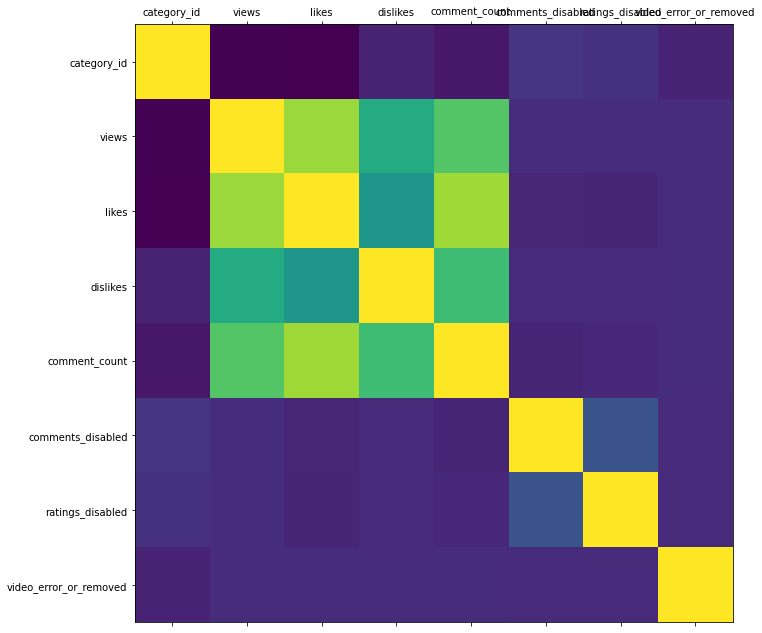

In [20]:
plot_correlation (videos)

<function matplotlib.pyplot.show>

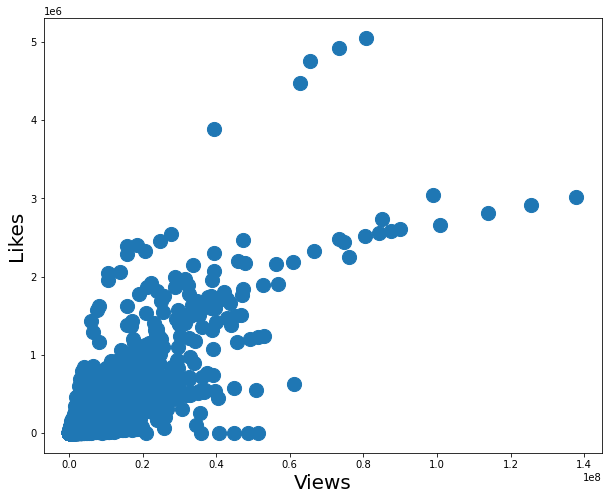

In [21]:
#bivariate relationships

plt.figure(figsize= (10,8))

plt.scatter(videos['views'], videos['likes'], s=200)

plt.xlabel ('Views', fontsize= 20)
plt.ylabel ('Likes', fontsize= 20)
plt.show
#Views vs Likes

Category Name count
Entertainment      13451
News & Politics     4159
People & Blogs      4105
Comedy              3773
Music               3731
Name: category_name, dtype: int64


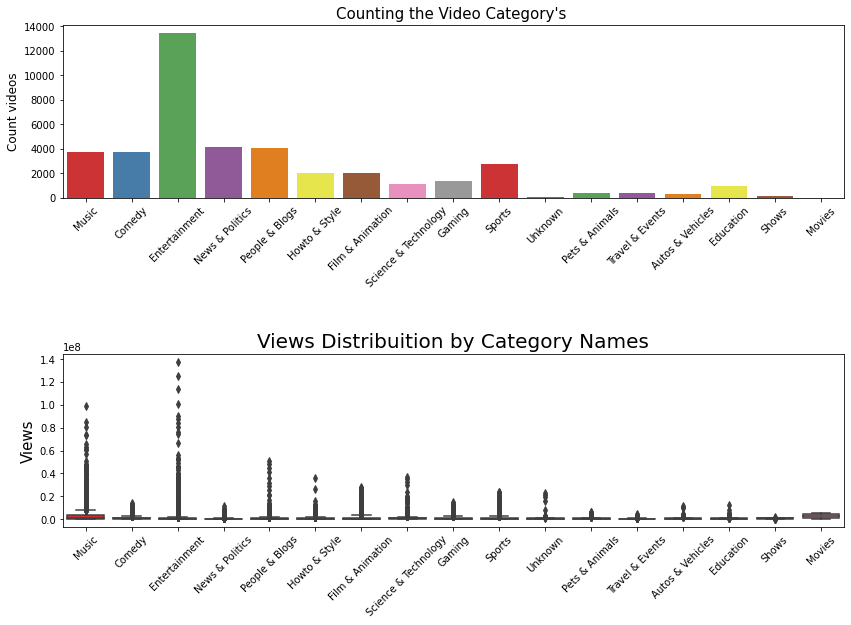

In [23]:
import seaborn as sns
print("Category Name count")
print(videos.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=videos, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count videos", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views', data=videos, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

## 4. Feauture Selection & Engineering

In this case, for load into Big Query, we will load whole columns

It is not needed encoding variables

It is not needed normalize

## 5. Export to Google Drive

In [26]:
export_csv = videos.to_csv (r'/content/gdrive/My Drive/data/Zype/videosforbigquery.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

# 6. Automatic Loading new files

In [38]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [39]:
import pandas_gbq

In [40]:
table_id = 'ZypeVideos.VideosTable4'
project_id = 'consummate-mark-284501'
param = 'fail'

In [43]:
sql = """
select count(*) FROM ZypeVideos.VideosTable 
"""
df = pandas_gbq.read_gbq(sql, project_id=project_id)
df.head(10)

,f0_
0,45801


In [51]:
sql = """
SELECT * FROM ZypeVideos.VideosTable where title like '%Marvel%'
"""
df1 = pandas_gbq.read_gbq(sql, project_id=project_id)
df1.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,t1PXLMxuiPs,18.03.04,( Q&A ) - Big Marvel,Big Marvel,10,2018-04-02 14:05:33+00:00,"Reading Comments|""big marvel""",408581,54326,268,9913,https://i.ytimg.com/vi/t1PXLMxuiPs/default.jpg,False,False,False,thank you for watching this video please like ...,Music
1,z0DEnq9MGZY,18.10.05,FORTNITE DANCE CHALLENGE - Big Marvel,Big Marvel,10,2018-05-09 13:58:16+00:00,"FORTNITE|""FORTNITE DANCE""|""FORTNITE DANCE CHAL...",547952,56469,1857,5061,https://i.ytimg.com/vi/z0DEnq9MGZY/default.jpg,False,False,False,thank you for watching this video please like ...,Music
2,L3ymBk6Vb04,18.29.04,Avengers: Infinity War Cast Sings The Marvel B...,The Tonight Show Starring Jimmy Fallon,23,2018-04-26 03:45:00+00:00,"The Tonight Show|""Jimmy Fallon""|""Avengers""|""In...",5635627,237235,3079,9147,https://i.ytimg.com/vi/L3ymBk6Vb04/default.jpg,False,False,False,The cast of Avengers Infinity War sing their ...,Comedy
3,L3ymBk6Vb04,18.30.04,Avengers: Infinity War Cast Sings The Marvel B...,The Tonight Show Starring Jimmy Fallon,23,2018-04-26 03:45:00+00:00,"The Tonight Show|""Jimmy Fallon""|""Avengers""|""In...",6893619,282829,3444,10728,https://i.ytimg.com/vi/L3ymBk6Vb04/default.jpg,False,False,False,The cast of Avengers Infinity War sing their ...,Comedy
4,luh7RLYn1Bw,18.05.04,Marvel's Spider-Man - Pre-Order Video | PS4,PlayStation,20,2018-04-04 15:00:03+00:00,"Marvel|""Spider-Man""|""Preorder""|""release date""|...",413937,14289,223,2401,https://i.ytimg.com/vi/luh7RLYn1Bw/default.jpg,False,False,False,Marvel s Spider Man will be available Septembe...,Gaming
5,wngt-csoPHg,17.30.11,Marvel Studios' Avengers: Infinity War Officia...,Ecomog Media Group,20,2017-11-29 16:07:35+00:00,"ecomog|""ecomogTV""|""Reaction""|""Trailer Reaction...",215375,13984,83,2247,https://i.ytimg.com/vi/wngt-csoPHg/default.jpg,False,False,False,Original Video https youtu be 6ZfuNTqbHE8 n...,Gaming
6,wngt-csoPHg,17.01.12,Marvel Studios' Avengers: Infinity War Officia...,Ecomog Media Group,20,2017-11-29 16:07:35+00:00,"ecomog|""ecomogTV""|""Reaction""|""Trailer Reaction...",333646,17902,142,2752,https://i.ytimg.com/vi/wngt-csoPHg/default.jpg,False,False,False,Original Video https youtu be 6ZfuNTqbHE8 n...,Gaming
7,eunPONMdJOo,17.16.12,Doing Stunts From Captain America: Civil War (...,Nick Pro,17,2017-12-15 20:52:29+00:00,"civil war stunts|""infinity war""|""captain ameri...",67464,1831,36,347,https://i.ytimg.com/vi/eunPONMdJOo/default.jpg,False,False,False,I recreated the stunts from the Captain Americ...,Sports
8,eunPONMdJOo,17.17.12,Doing Stunts From Captain America: Civil War (...,Nick Pro,17,2017-12-15 20:52:29+00:00,"civil war stunts|""infinity war""|""captain ameri...",172107,3273,88,433,https://i.ytimg.com/vi/eunPONMdJOo/default.jpg,False,False,False,I recreated the stunts from the Captain Americ...,Sports
9,p1DAEZNyJ8E,18.23.04,Avengers: Infinity War | Marvel Family Feud,Marvel Studios Movies,29,2018-04-22 23:21:45+00:00,"Avengers: Infinity War|""Avengers""|""scarlett jo...",56096,3791,43,580,https://i.ytimg.com/vi/p1DAEZNyJ8E/default.jpg,False,False,False,no_description,Unknown


Example for writing into BIG Query

In [ ]:
#pandas_gbq.to_gbq(videos, table_id, project_id=project_id, if_exists= append) 

# SQL Analytical Queries (Excecute it in Big Query)

## 1. Show Top 10 viewed videos by each category

In [ ]:
#1. Show Top 10 viewed videos by each category

#SELECT * FROM  	ZypeVideos.VideosTable WHERE video_id = '_1mIPOYZzfo'


# First Step, list videos and sum views

SELECT category_name, video_id, title, MAX (views) AS views
FROM 	ZypeVideos.VideosTable WHERE CATEGORY_NAME IS NOT NULL
GROUP BY category_name, video_id, title ;

#Second Step, RANK by Category
/*
SELECT 
		category_name, video_id, title, views,
		RANK() OVER(
			PARTITION BY category_name
			ORDER BY views DESC) 
			view_rank
	FROM 
		(
           SELECT category_name, video_id, title, MAX (views) AS views
        FROM 	ZypeVideos.VideosTable WHERE CATEGORY_NAME IS NOT NULL
        GROUP BY category_name, video_id, title 
    )
*/
#Third Step, RANK by Category only top 10
 
/*
 WITH top_categories as (
SELECT 
		category_name, video_id, title, views,
		RANK() OVER(
			PARTITION BY category_name
			ORDER BY views DESC) 
			view_rank
	FROM 
		(
        SELECT category_name, video_id, title, MAX (views) AS views
          FROM 	ZypeVideos.VideosTable WHERE CATEGORY_NAME IS NOT NULL
           GROUP BY category_name, video_id, title
    )
    )
    SELECT 
    category_name, video_id, title, views, view_rank
    FROM top_categories
    where view_rank <= 10
    ;



## 2. Show 5 overall disliked videos

In [ ]:
#2. Show 5 overall disliked videos

SELECT  video_id, title, MAX (dislikes) AS dislikes
  FROM 	ZypeVideos.VideosTable 
GROUP BY video_id, title
ORDER BY 3  DESC
LIMIT 5


## 3. Show the average number of likes in ‘Autos & Vehicles’ category

In [ ]:
#3. Show the average number of likes in ‘Autos & Vehicles’ category


#per videos
 SELECT AVG(likes) AS AVERAGE_LIKES
FROM (

SELECT category_name, video_id, title, MAX (likes) AS likes
FROM 	ZypeVideos.VideosTable WHERE CATEGORY_NAME = 'Autos & Vehicles'
GROUP BY category_name, video_id, title
)



## 4. Show number of unique videos in top 3 categories by likes, published during 2014-2018

In [ ]:
#4. Show number of unique videos in top 3 categories by likes, published during 2014-2018

#top 3 categories by likes

SELECT COUNT (DISTINCT video_id ) AS COUNT_UNIQUE_VIDEOS
FROM ZypeVideos.VideosTable
WHERE CATEGORY_NAME IN (

                      SELECT category_name
                          FROM 
                          (
                                SELECT category_name, video_id, title, MAX (likes) AS likes
                                FROM 	ZypeVideos.VideosTable 
                                GROUP BY category_name, video_id, title
                          )
                          GROUP BY category_name
                          ORDER BY SUM (likes) DESC
                          LIMIT 3
                      )
        AND EXTRACT (YEAR FROM publish_time) between 2014 and 2018

